In [67]:
# packages
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px


In [7]:
# import raw earthquake data
raw_eqk = pd.read_csv("https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv")

# head of data 
raw_eqk.head(3)

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake


In [12]:
# unique earthquake types
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

In [25]:
# Select only data with with type equal to ‘eartquake’ and magnitude greater than or equal to 6.5.
eqk = raw_eqk[(raw_eqk.type == 'earthquake') & (raw_eqk.mag > 6.5)]

In [60]:
#Overwrite eqk dataframe as a geopandas.GeoDataFrame. 
#HINT: find the CRS of the dataset by looking at the metadata.

eqk = gpd.GeoDataFrame(eqk,
                      geometry = gpd.points_from_xy(eqk.longitude,
                                                   eqk.latitude),
                      crs = 'EPSG:4326')

eqk.head(3)



,time,latitude,longitude,depth,mag,id,place,type,geometry
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.0,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake,POINT (82.58640 35.90530)
22968,2014-03-16 21:16:29.600,-19.9807,-70.7022,20.0,6.7,usc000ndnj,"64km WNW of Iquique, Chile",earthquake,POINT (-70.70220 -19.98070)
24887,2014-03-10 05:18:13.400,40.8287,-125.1338,16.6,6.8,nc72182046,"78km WNW of Ferndale, California",earthquake,POINT (-125.13380 40.82870)


<AxesSubplot:>

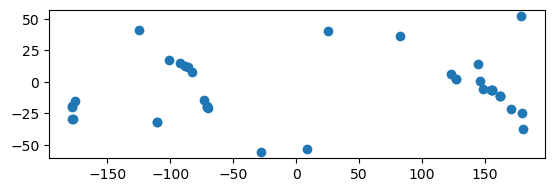

In [61]:
eqk.plot()

In [62]:
# import Natural Earth’s low-resolution countries polygons using geopandas
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap


worldmap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

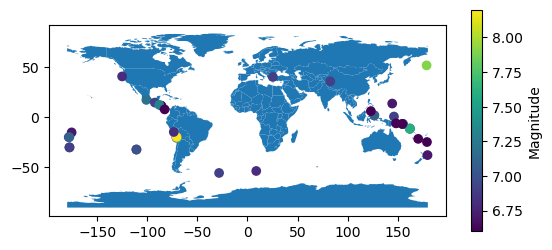

In [79]:
# Create a map of the earthquales of magnitude greater equal to 6.5 across the world in 2014. 
# Color the points by the magnitude. This is an example of how it could look like:
fig, ax = plt.subplots()

worldmap.plot(ax=ax)
eqk.plot(ax=ax, 
         column = 'mag',
         legend = True,
        legend_kwds ={'shrink':.6,
                     'label': "Magnitude"})


        # color_continuous_scale='Inferno'